# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [61]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [62]:
athletes = pd.read_csv("athletes.csv")

In [63]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [64]:
# Sua análise começa aqui.
athletes.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [65]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [66]:
altura = get_sample(athletes,['height'], n=3000)
altura

,height
1811,1.79
7962,1.81
10280,1.83
317,1.68
6989,2.01
7975,2.02
4430,1.78
7293,1.57
2248,1.59
5109,1.82


In [67]:
peso = get_sample(athletes, ['weight'], n=3000)
log_peso = np.log(peso)

In [68]:
bra = athletes[athletes['nationality'] == 'BRA']
bra

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
79,236523132,Adam Imer,BRA,male,8/18/89,1.82,88.0,hockey,0,0,0
106,993710181,Adenizia da Silva,BRA,female,12/18/86,1.87,65.0,volleyball,0,0,0
109,930618704,Adilson da Silva,BRA,male,1/24/72,1.70,79.0,golf,0,0,0
114,787208883,Adrian Baches,BRA,male,4/7/90,1.84,83.0,aquatics,0,0,0
128,80367651,Adriana Aparecida da Silva,BRA,female,7/22/81,1.66,52.0,athletics,0,0,0
129,593328448,Adriana Araujo,BRA,female,11/4/81,1.67,NaN,boxing,0,0,0
132,529241363,Adriana Moises,BRA,female,12/6/78,1.70,65.0,basketball,0,0,0
145,28097741,Agatha Bednarczuk,BRA,female,6/22/83,1.82,70.0,volleyball,0,1,0
284,74286490,Aldemir da Silva Junior,BRA,male,6/8/92,1.93,80.0,athletics,0,0,0
355,566695148,Alex Garcia,BRA,male,3/4/80,1.92,102.0,basketball,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
def q1():
    # Retorne aqui o resultado da questão 1.
    altura = get_sample(athletes,'height', n=3000)
    shapiro_value, shapiro_p_valor = sct.shapiro(altura)
    return shapiro_p_valor>0.05

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

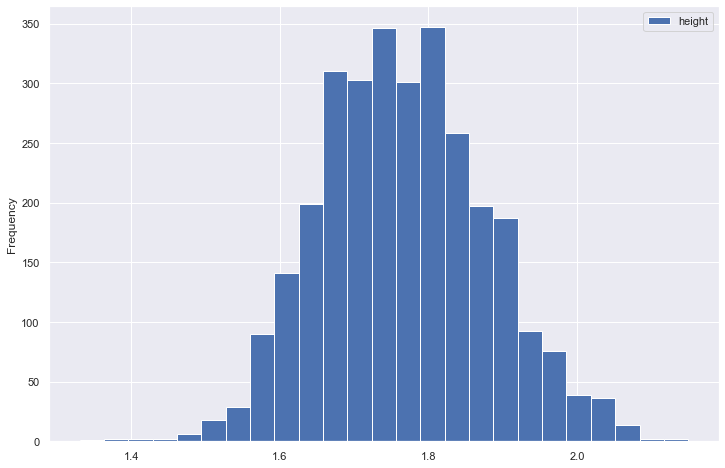

In [49]:
altura.plot(kind='hist', bins=25);

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [39]:
def q2():
    # Retorne aqui o resultado da questão 2.
    resultado = sct.jarque_bera(altura)
    return resultado[1]>0.05

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [64]:
def q3():
    # Retorne aqui o resultado da questão 3.
    peso = get_sample(athletes, ['weight'], n=3000)
    th = sct.normaltest(peso)
    return th[1]>0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

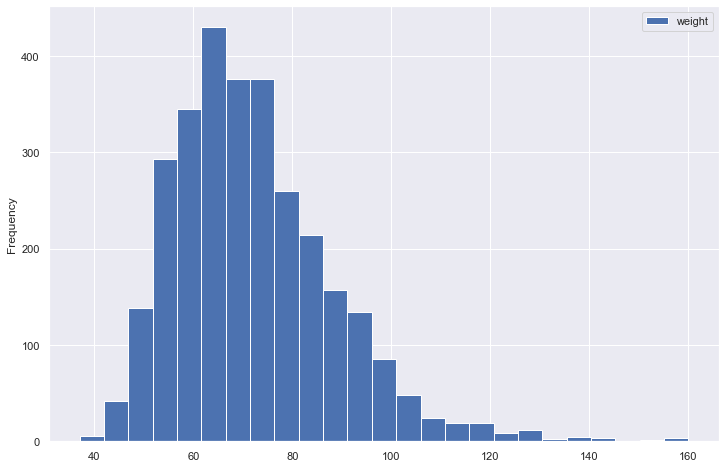

In [62]:
peso.plot(kind='hist', bins=25)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [24]:
def q4():
    # Retorne aqui o resultado da questão 4.
    log_peso = np.log(peso)
    th = sct.normaltest(log_peso)
    return th[1]>0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

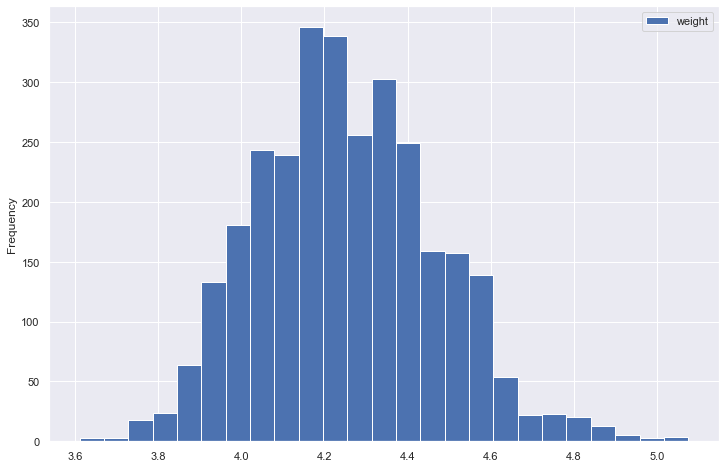

In [28]:
log_peso.plot(kind='hist', bins=25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [51]:
bra = athletes[athletes['nationality'] == 'BRA']['height'].dropna()
usa = athletes[athletes['nationality'] == 'USA']['height'].dropna()
can = athletes[athletes['nationality'] == 'CAN']['height'].dropna()

In [52]:
def q5():
    # Retorne aqui o resultado da questão 5.
    resultado = sct.ttest_ind(bra, usa)
    return resultado[1]>0.025

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [54]:
def q6():
    # Retorne aqui o resultado da questão 6.
    resultado = sct.ttest_ind(bra, can)
    return resultado[1]>0.025

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [69]:
def q7():
    # Retorne aqui o resultado da questão 7.
    resultado = sct.ttest_ind(usa, can, equal_var=False)
    return np.round(resultado[1], 8)
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?